In [1]:
import autograd.numpy as np
from autograd import grad

from tqdm import tqdm

import torch
from torch.autograd import Variable, Function

from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

from gaussian_example import gaussian
from stein_LSoperator import stein_LS

from kernels import kernels, rbf_kernel, imq_kernel, poly_kernel

import seaborn as sns
sns.set()

In [2]:
p_data = gaussian(dict(mu=np.array([1, 0., 0.]), sigma=np.eye(3)))
q_var = gaussian(dict(mu=np.array([0., 0., 0.]), sigma=np.eye(3)))

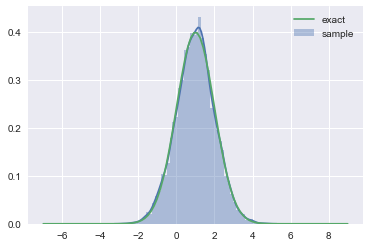

(10000, 3)

In [3]:
sam = p_data.sampler(10000)
sns.distplot(sam[:,0], label='sample')

mu = 1.0
x = np.linspace(-8 + mu, 8 + mu,100)
plt.plot(x, [p_data.density(x_, np.array([mu]), np.eye(1)) for x_ in x], label='exact')

plt.legend(loc='upper right')
plt.show()
sam.shape

In [4]:
def f(x):
    return (1 + (x**2).sum())**(-1/2)

In [5]:
test = stein_LS(dict(p=p_data, q=q_var))

In [6]:
n_samples = 2**(np.arange(5,10))
stein_val = np.array([test.stein_Operator(n_, f) for n_ in n_samples])

100%|██████████| 512/512 [00:00<00:00, 1091.25it/s]


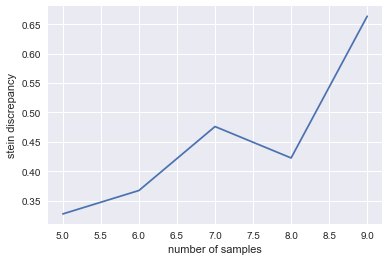

array([ 0.32737827,  0.36722273,  0.476061  ,  0.42259258,  0.66377069])

In [7]:
plt.plot(np.log2(n_samples), (stein_val))
plt.xlabel('number of samples')
plt.ylabel('stein discrepancy')
plt.show()

stein_val

In [8]:

# p_data = gaussian(dict(mu=np.array([1, 0., 0.]), sigma=np.eye(3)))
# q_var = gaussian(dict(mu=np.array([0., 0., 0.]), sigma=np.eye(3)))
# test = stein_LS(dict(p=p_data, q=q_var))

# n_samples = 2**(np.arange(4,10))

# k = kernels('rbf')
# g = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    
# g_1 = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    
# g_2 = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    

# stein_val = np.array([test.stein_Operator(n_, g) for n_ in n_samples])
# stein_val_1 = np.array([test.stein_Operator(n_, g_1) for n_ in n_samples])
# stein_val_2 = np.array([test.stein_Operator(n_, g_2) for n_ in n_samples])


# stein_sum = (stein_val + stein_val_1 + stein_val_2)/3

# plt.plot(np.log2(n_samples), (stein_val), label='sample 1')
# plt.plot(np.log2(n_samples), (stein_val_1), label='sample 2')
# plt.plot(np.log2(n_samples), (stein_val_2), label='sample 3')
# plt.plot(np.log2(n_samples), (stein_sum), label='average')
# plt.legend(loc='upper right')

# plt.xlabel('number of samples')
# plt.ylabel('stein discrepancy')
# plt.show()

# stein_sum

# Add kolmogorov - smirnov statistics test
# add KL divergence test
# compare to wasserstein metric

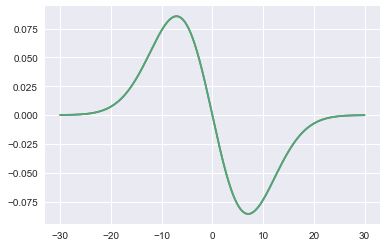

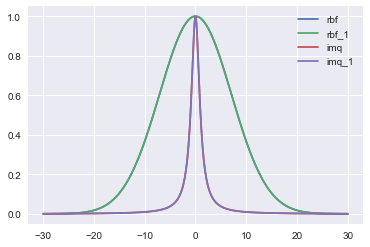

In [9]:
k = kernels('rbf')
k_2 = kernels('imq')

rbf = rbf_kernel()
imq = imq_kernel()


n = 1
k.grad_kx( y=np.ones(n) ,x = np.ones(n))

y = np.linspace(-30, 30, 500)
plt.plot(y, [k.grad_kx(y = np.zeros(n), x=x_) for x_ in y], label='rbf')
plt.plot(y, [rbf.grad_x(y = np.zeros(n), x=x_) for x_ in y], label='rbf_1')

# plt.plot(y, [k_2.grad_kx(y =np.zeros(n), x=x_) for x_ in y], label='imq')
# plt.legend(loc='upper right')
plt.show()

plt.plot(y, [k.rbf(np.zeros(n), x_) for x_ in y], label='rbf')
plt.plot(y, [rbf.value(np.zeros(n), x_) for x_ in y], label='rbf_1')

plt.plot(y, [k.imq(np.zeros(n), x_,  beta=1) for x_ in y], label='imq')
plt.plot(y, [imq.value(np.zeros(n), x_) for x_ in y], label='imq_1')

# plt.plot(y, [k.polynomial(x_, x_,  degree=2) for x_ in y], label='imq')

plt.legend(loc='upper right')
plt.show()

In [10]:
# from ksd import ksd

# sigma1 = np.array([[1,0,0,0],
#                    [0,1,0,0],
#                    [0,0,3,0],
#                    [0,0,0,1]])
# mu1 = np.array([10. , 10. , 110. , 120.])

# sigma2 = np.array([[1,0,0,0],
#                    [0,20,0,0],
#                    [0,0,3,1],
#                    [0,0,1,1]])
# mu2 = np.array([10. , 10. , 110. , 120.])

# p_data = gaussian(dict(mu=mu1, sigma=sigma1))
# q_var = gaussian(dict(mu=mu2, sigma=sigma2))

# n_samples = 2**(np.arange(3,6))


# stein_rbf = ksd(dict(name='rbf', p=p_data, q=q_var))
# stein_val_0 = np.array([stein_rbf.stein_Op(n_) for n_ in n_samples])
# plt.plot(np.log2(n_samples), (stein_val_0))
# plt.show()

# stein_imq = ksd(dict(name='imq', p=p_data, q=q_var))
# stein_val_1 = np.array([stein_imq.stein_Op(n_) for n_ in n_samples])
# plt.plot(np.log2(n_samples), (stein_val_1))
# plt.show()

# stein_val_0

# New kernel approach

100%|██████████| 512/512 [00:04<00:00, 114.49it/s]


array([ 0.25174181,  0.09942487,  0.00069505,  0.01676157,  0.07452748,
       -0.04704153,  0.08512156,  0.01403225])

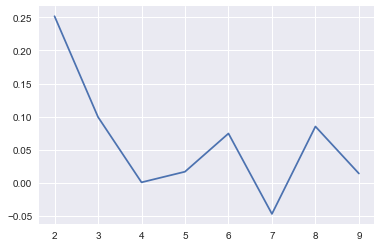

In [18]:
from stein_RRS import stein_RRS

sigma3 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu3 = np.array([10. , 10. , 110. , 120.])

sigma4 = np.array([[1,0,0,1],
                   [0,1,0,0],
                   [0,0,3,0],
                   [1,0,0,1]])
mu4 = np.array([10. , 10. , 110. , 115.])

p_data = gaussian(dict(mu=mu3, sigma=sigma3))
q_var = gaussian(dict(mu=mu4, sigma=sigma4))

n_samples = 2**(np.arange(2, 10))

stein_rbf = stein_RRS(dict(name='rbf', p=p_data, q=q_var, beta=1e-2))
stein_val_0 = np.array([stein_rbf.stein_Op(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_0))

stein_val_0

100%|██████████| 512/512 [00:03<00:00, 146.55it/s]


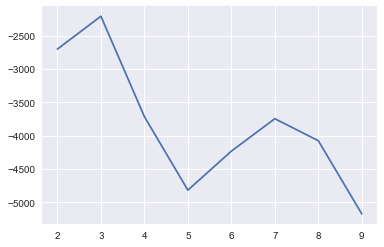

array([-2703.57533967, -2211.31390016, -3714.77257845, -4816.42489754,
       -4232.519155  , -3746.33874372, -4075.74039857, -5172.69244365])

In [20]:
stein_imq = stein_RRS(dict(name='imq', p=p_data, q=q_var, beta=1, c=1))
stein_val_1 = np.array([stein_imq.stein_Op(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_1))
plt.show()

stein_val_1


In [14]:
# def mu(i):
#     return mu1 + np.array([1. + 1./(1. + i) , 0. , 1./(1 + i), 0.])

# start_ , end_ = 7, 14

# stein_val_i = []
# stein_val_j = []


# for i in (range(start_, end_)):
#     stein_1 = ksd(dict(name='imq', p=p_data, q=gaussian(dict(mu=mu(i), sigma=sigma1)))).stein_Op(64)
#     stein_val_i.append(stein_1)

#     stein_2 = stein_RRS(dict(name='imq', p=p_data, q=gaussian(dict(mu=mu(i), sigma=sigma1)))).stein_Op(64)
#     stein_val_j.append(stein_2)

    
# plt.plot(np.arange(start_, end_), (stein_val_i), label='ksd')
# plt.plot(np.arange(start_, end_), (stein_val_j), label='stein_RRS')
# plt.legend(loc='upper right')

# plt.show()

100%|██████████| 1024/1024 [00:04<00:00, 248.72it/s]


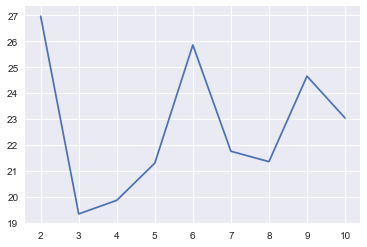

100%|██████████| 1024/1024 [00:03<00:00, 282.52it/s]


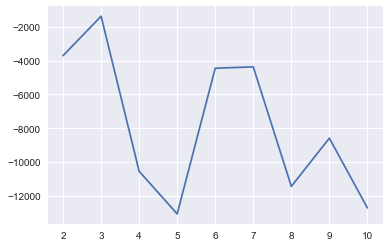

array([ 26.96630783,  19.33791418,  19.86136353,  21.2978904 ,
        25.85859612,  21.75653482,  21.35498977,  24.65452545,  23.03949878])

In [15]:
from stein_RRS import stein_RRS
from ksd import ksd

sigma3 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu3 = np.array([10. , 10. , 110. , 120.])

sigma4 = np.array([[1,0,0,1],
                   [0,1,0,0],
                   [0,0,3,0],
                   [1,0,0,1]])
mu4 = np.array([10. , 10. , 110. , 125.])

p_data = gaussian(dict(mu=mu3, sigma=sigma3))
q_var = gaussian(dict(mu=mu4, sigma=sigma4))

n_samples = 2**(np.arange(2, 11))

stein_r = ksd('rbf', dict(p=p_data, q=q_var, beta=1e-2))
stein_i = ksd('imq', dict(p=p_data, q=q_var, beta=1, c=1))

stein_val_0 = np.array([stein_r.stein_Op(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_0))
plt.show()

stein_val_1 = np.array([stein_i.stein_Op(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_1))
plt.show()

stein_val_0



# imq kernel gradients not fixed